<a href="https://colab.research.google.com/github/nithinivi/Deep_Learning_Discussion/blob/main/001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks

Neural networks, a beautiful biologically-inspired programming paradigm which enables a computer to learn from observational data


<img src="http://neuralnetworksanddeeplearning.com/images/tikz12.png">


<img src ="https://www.codeproject.com/KB/AI/Backprop_ANN/NN2.png">

## relu

<img src="https://machinelearningmastery.com/wp-content/uploads/2018/10/Line-Plot-of-Rectified-Linear-Activation-for-Negative-and-Positive-Inputs.png" width="400">



- Dropout

<img src="https://raw.githubusercontent.com/hiromis/notes/master/lesson6/6.png" width=400>



### Loss

- Cross Entropy
  
  Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. So predicting a probability of 0.012 when the actual observation label is 1 would be bad and result in a high loss value. A perfect model would have a log loss of 0.


![neural network](https://ml-cheatsheet.readthedocs.io/en/latest/_images/cross_entropy.png)

\begin{equation}
{(y\log(p) + (1 - y)\log(1 - p))}
\end{equation}

### Softmax

The softmax function takes as input a vector z of K real numbers, and normalizes it into a probability distribution consisting of K probabilities proportional to the exponentials of the input numbers. That is, prior to applying softmax, some vector components could be negative, or greater than one; and might not sum to 1; but after applying softmax, each component will be in the interval [ 0 , 1 ], and the components will add up to 1, so that they can be interpreted as probabilities. Furthermore, the larger input components will correspond to larger probabilities. 

\begin{equation}
\sigma(\mathbf{z})_i = \frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}} \ \ \ \ \text{ for } i = 1, \dotsc , K \text{ and } \mathbf z=(z_1,\dotsc,z_K) \in R^K.
\end{equation}





  # optim


```
  def model(inp):
      l1 = inp @ w1 + b1
      l2 = relu(l1)
      out = l2 @ w2 + b2
      return out

  def backward pass():
  # Back Propagation
      mse_grad(out, targ)
      lin_grad(l2, out, w2, b2)
      relu_grad(l1, l2)
      lin_grad(inp, l1, w1, b1)
  ```
  ```
  y_hat = model(xb)
  loss = loss_func(y_hat, yb)
  backard_pass(y_hat, yb) 


  for l in model.layers:
    l.weight -= l.weight.grad * lr
    l.bias   -= l.bias.grad   * lr
    l.weight.grad.zero_()
    l.bias  .grad.zero_()

```



### Optimizer

- SGD

Gradient descent is a way to minimize an objective function $J(\theta)$ parameterized by a model's parameters $\theta \in \mathbb{R}^d$ by updating the parameters in the opposite direction of the gradient of the objective function $\nabla_\theta J(\theta)$ w.r.t. to the parameters. The learning rate $\eta$ determines the size of the steps we take to reach a  minimum. In other words, we follow the direction of the slope of the surface created by the objective function downhill until we reach a valley.



\begin{equation}
\theta = \theta - \eta \cdot \nabla_\theta J( \theta)
\end{equation}

- Moementum

Momentum is a method that helps accelerate SGD in the relevant direction and dampens oscillations . It does this by adding a fraction $\gamma$ of the update vector of the past time step to the current update vector
\begin{align}
\begin{split}
v_t &= \gamma v_{t-1} + \eta \nabla_\theta J( \theta)\\
\theta &= \theta - v_t
\end{split}
\end{align}

The momentum term $\gamma$ is usually set to $0.9$ or a similar value.

Essentially, when using momentum, we push a ball down a hill. The ball accumulates momentum as it rolls downhill, becoming faster and faster on the way (until it reaches its terminal velocity, if there is air resistance, i.e. $\gamma < 1$). The same thing happens to our parameter updates: The momentum term increases for dimensions whose gradients point in the same directions and reduces updates for dimensions whose gradients change directions. As a result, we gain faster convergence and reduced oscillation.


- Adam 

Adaptive Moment Estimation (Adam) is a method  that calculates  adaptive learning rates for each parameter. Adam stores an exponentially decaying average of past squared gradients $v_t$ l exponentially decaying average of past gradients $m_t$, similar to momentum:

 we set $g_{t, i}$ to be the gradient of the objective function w.r.t. to the parameter $\theta_i$ at time step $t$:


\begin{equation}
g_{t, i} = \nabla_{\theta_t} J( \theta_{t,i} )
\end{equation}

The SGD update for every parameter $\theta_i$ at each time step $t$ then becomes:

\begin{equation}
\theta_{t+1} = \theta_{t} - \eta \cdot g_{t}
\end{equation}
   

Moving variance $v_t$ and mean $m_t$



\begin{align}
\begin{split}
m_t &= \beta_1 m_{t-1} + (1 - \beta_1) g_t\\
v_t &= \beta_2 v_{t-1} + (1 - \beta_2) g_t^2
\end{split}
\end{align}

$m_t$ and $v_t$ are estimates of the  mean and variance of the gradients respectively. As $m_t$ and $v_t$ are initialized as vectors of $0$'s, the authors of Adam observe that they are biased towards zero, especially during the initial time steps, and especially when the decay rates are small 

They counteract these biases by computing bias-corrected first and second moment estimates:

\begin{align}
\begin{split}
\hat{m}_t &= \frac{m_t}{1 - \beta^t_1}\\
\hat{v}_t &= \frac{v_t}{1 - \beta^t_2}
\end{split}
\end{align}

They then use these to update the parameters which yields the Adam update rule:

\begin{equation}
\theta_{t+1} = \theta_{t} - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \hat{m}_t
\end{equation}

The authors propose default values of 0.9 for β1, 0.999 for β2, and 10−8
for $\epsilon$.





<img alt="" class="pn ut et fh fd mn v c" width="600" height="458" role="presentation" src="https://miro.medium.com/max/600/1*U224pqhF4WUOZhfmDIWtxA.gif" srcset="https://miro.medium.com/max/276/1*U224pqhF4WUOZhfmDIWtxA.gif 276w, https://miro.medium.com/max/552/1*U224pqhF4WUOZhfmDIWtxA.gif 552w, https://miro.medium.com/max/600/1*U224pqhF4WUOZhfmDIWtxA.gif 600w" sizes="600px">



In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch 


from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")


from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras import models, layers

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("train_images shape: {}".format(train_images.shape))
print("train_labels shape: {}".format(train_labels.shape))
print("test_images shape: {}".format(test_images.shape))
print("test_labels shape: {}".format(test_labels.shape))

11501568/11490434 [==============================] - 0s 0us/step
train_images shape: (60000, 28, 28)
train_labels shape: (60000,)
test_images shape: (10000, 28, 28)
test_labels shape: (10000,)


The first 10 labels in train_labels: [5 0 4 1 9 2 1 3 1 4]


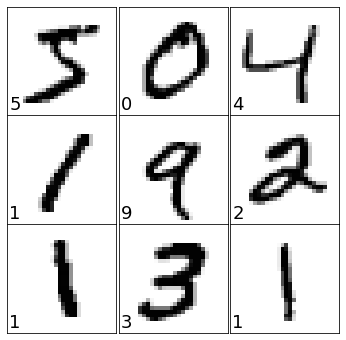

In [ ]:
print("The first 10 labels in train_labels: {}".format(train_labels[:10]))

plt.rcParams["font.size"] = 18
plt.figure(figsize=(6,6))

for j in range(9):
    plt.subplot(3,3, j+1)
    plt.imshow(train_images[j],cmap=plt.cm.binary)
    plt.tick_params(bottom=False,left=False,labelbottom=False,labelleft=False)
    plt.text(0,26,'%d'%train_labels[j])
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [ ]:
train_images=train_images.reshape((60000, 28*28)) # change the shape
train_images=train_images.astype('float32')/255 # normalization

test_images=test_images.reshape((10000, 28*28)) # change the shape
test_images=test_images.astype('float32')/255 # normalization

In [ ]:
# The one-hot encoding will be performed for train_labels and test_label
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print("train_labels shape: ".format(train_labels.shape))
print("test_labels shape: ".format(test_labels.shape))

print("The first 10 rows in the train_labels:\n{}".format(train_labels[:10]))

train_labels shape: 
test_labels shape: 
The first 10 rows in the train_labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [ ]:

network = models.Sequential()
network.add(layers.Dense(16, activation = 'relu', input_shape=(28*28,)))
network.add(layers.Dense(16, activation = 'relu'))
network.add(layers.Dense(10, activation='softmax'))

network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print("The numeber of parameters for weights first layer : ", 28*28*16+16)
print("The numeber of parameters for weights second layer : ", 16*16 + 16)
print("The numeber of parameters for weights third layer : ", 10*16+10)

The numeber of parameters for weights first layer :  12560
The numeber of parameters for weights second layer :  272
The numeber of parameters for weights third layer :  170


In [ ]:
network.compile(optimizer='adam',
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])
                
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 1.1397 - accuracy: 0.6577
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2981 - accuracy: 0.9173
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2424 - accuracy: 0.9310
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2173 - accuracy: 0.9386
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2005 - accuracy: 0.9439


In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("test_loss", test_loss)
print("test_acc: ", test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.1994 - accuracy: 0.9429
test_loss 0.19937458634376526
test_acc:  0.9429000020027161


# Refernces
- http://neuralnetworksanddeeplearning.com/chap1.html
- https://arxiv.org/pdf/1609.04747.pdf
- http://cs231n.github.io/optimization-1/